In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import neighbors,preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_svmlight_file 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [126]:
#for i in range(1,11):
   # with open('Dataset/batch' + str(i) + '.dat', 'r') as file :
     #   filedata = file.read()
      #  filedata = filedata.replace(';', ' ')
   # with open('Dataset/batch' + str(i) + '.dat', 'w') as file:
     #   file.write(filedata)

# Batch 2

In [127]:
seed = 1001

X_1, y_1 = load_svmlight_file(f='Dataset/batch1.dat', dtype=np.float64)
X_1 = pd.DataFrame(X_1.toarray()) 
y_1 = pd.Series(y_1)  

X_2, y_2 = load_svmlight_file(f='Dataset/batch2.dat', dtype=np.float64)
X_2 = pd.DataFrame(X_2.toarray()) 
y_2 = pd.Series(y_2)  

In [128]:
X_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,...,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,125598.154467,6.105952,27.857710,38.144605,44.128000,-22.588372,-29.794852,-68.791987,107079.558616,5.100556,...,-7.937931,-9.546743,16178.656558,9.408597,4.673120,8.052993,9.121342,-3.986980,-6.526546,-8.006173
std,154508.292267,4.888478,34.411330,46.167415,56.617419,28.699951,40.442581,121.644048,121831.976951,3.643984,...,6.947474,8.616719,10203.134157,5.721681,3.367555,6.750219,7.448286,3.242606,5.511495,7.121117
min,-518.410100,0.975693,0.237609,0.385293,1.691446,-131.332873,-227.627758,-802.153878,-40.130800,0.998182,...,-32.451273,-71.867195,114.563200,1.026784,0.151100,0.212589,0.751308,-16.316526,-26.465044,-60.043362
25%,13925.168000,1.644067,3.469116,4.744795,5.876002,-26.454306,-32.915759,-69.818965,14281.884700,1.722903,...,-12.147438,-13.189142,8212.465700,5.225894,1.974975,2.916926,3.325322,-5.903510,-9.852850,-11.171626
50%,73888.513600,4.937347,14.722279,19.372862,21.541595,-11.516816,-14.361441,-22.475106,69638.872100,4.118076,...,-5.480641,-6.818436,14378.066900,7.082021,3.839486,6.037789,6.782874,-2.866766,-4.586299,-5.843878
75%,163294.027300,9.785838,37.921243,55.857809,60.098814,-3.031027,-3.760867,-5.109815,150200.039000,7.994448,...,-2.716342,-3.859406,22025.415100,13.353138,6.962171,11.293738,13.172462,-1.562399,-2.399658,-3.443906
max,670687.347700,25.289719,167.079751,226.619457,393.564132,-0.029429,22.201589,115.273147,502202.812500,17.454040,...,9.270956,11.516418,55483.907000,28.312023,17.103240,37.555263,42.039307,-0.016275,6.851792,8.357968


In [129]:
y_1.describe()

count    445.000000
mean       3.256180
std        1.778751
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
dtype: float64

In [130]:
X_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,125670.729174,7.210686,31.498924,43.299366,54.780294,-22.682268,-33.176151,-134.561176,109980.688315,5.483277,...,-11.661499,-16.468370,25292.971594,8.832586,7.884309,14.211324,16.393009,-6.275952,-9.894582,-14.070760
std,107989.054724,38.298923,27.966567,38.924238,58.185579,19.833938,30.534261,158.912522,92029.275617,9.310303,...,6.531577,13.371319,11855.236929,6.117533,4.013822,12.395694,12.205415,3.371521,5.540063,13.032557
min,-12826.543000,0.735441,0.035093,0.087400,0.424107,-58.507407,-142.312124,-591.966080,-4839.446300,0.730853,...,-34.088003,-339.093370,-146.163600,0.977411,0.019045,0.112335,0.559992,-12.503978,-36.497659,-363.715390
25%,14657.488975,2.603823,3.051570,4.028595,4.667749,-42.577724,-55.469603,-235.466953,14847.189800,2.463274,...,-17.419213,-23.740336,15485.927850,4.807792,4.532546,6.246528,7.365781,-9.140074,-14.293421,-19.761337
50%,106876.766550,4.559537,28.962322,39.528717,46.832039,-19.480899,-26.479149,-48.968182,94961.769500,4.072430,...,-10.415700,-14.299892,24118.560550,6.680389,8.241809,11.833677,14.185768,-5.746875,-8.949407,-12.081069
75%,218594.638550,6.788240,57.764607,80.234173,93.555064,-2.303079,-2.825945,-3.824501,183451.605475,5.525068,...,-6.057116,-8.954061,36280.435450,11.530442,11.037026,17.097960,20.250619,-3.443342,-5.233768,-7.572330
max,316646.062500,1339.879283,84.901104,145.101458,993.605306,-0.006941,-0.099039,-0.475184,268772.910100,290.619975,...,-0.098205,-0.680036,47296.089300,45.574835,28.273060,297.225880,195.242555,-0.003817,-0.049512,-0.653490


In [131]:
X_train = X_1
y_train = y_1
X_test = X_2
y_test = y_2

# Data preprocessing

In [132]:
scaler = StandardScaler() 

scaler.fit(X_train) 
print(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

             0          1          2          3          4          5    \
0     15596.1621   1.868245   2.371604   2.803678   7.512213  -2.739388   
1     26402.0704   2.532401   5.411209   6.509906   7.658469  -4.722217   
2     42103.5820   3.454189   8.198175  10.508439  11.611003  -7.668313   
3     42825.9883   3.451192  12.113940  16.266853  39.910056  -7.849409   
4     58151.1757   4.194839  11.455096  15.715298  17.654915 -11.083364   
..           ...        ...        ...        ...        ...        ...   
440   74805.0518   6.707129  15.446750  19.415134  20.782742 -12.073277   
441   92035.5156   7.775487  21.173590  27.620422  29.159638 -14.717438   
442  107898.2334   8.994761  25.131079  33.771374  37.121172 -17.064423   
443  119795.0352   9.582606  28.944716  39.290350  41.062943 -18.824844   
444  140782.2978  10.975342  35.524802  59.584134  50.208230 -21.607891   

           6          7            8         9    ...       118       119  \
0    -3.344671  -4.847

# PCA

In [133]:
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [134]:
fig = px.scatter(X_train, x=0, y=1)
fig.show()

In [135]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Algorithms

In [136]:
def clf_knn(X_train,y_train,X_test,y_test):
    clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    clf_knn = clf_knn.fit(X_train, y_train)
    pred_knn = clf_knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, pred_knn)
    print("Knn: ",accuracy_knn*100)
clf_knn(X_train,y_train,X_test,y_test)

def clf_sgd(X_train,y_train,X_test,y_test):
    clf_sgd = SGDClassifier(loss="log_loss", max_iter=5).fit(X_train, y_train)
    pred_sgd = clf_sgd.predict(X_test)
    accuracy_sgd = accuracy_score(y_test, pred_sgd)
    print("SGD: ",accuracy_sgd*100)
clf_sgd(X_train,y_train,X_test,y_test)

Knn:  75.2411575562701
SGD:  89.38906752411575


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



# Batch 3

In [137]:
X_3, y_3 = load_svmlight_file(f='Dataset/batch3.dat', dtype=np.float64)
X_3 = pd.DataFrame(X_3.toarray()) 
y_3 = pd.Series(y_3)

X_test = X_3
y_test = y_3 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test)  

Knn:  56.746532156368225
SGD:  77.11223203026482


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [138]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 4

In [139]:
X_4, y_4 = load_svmlight_file(f='Dataset/batch4.dat', dtype=np.float64)
X_4 = pd.DataFrame(X_4.toarray()) 
y_4 = pd.Series(y_4) 

X_test = X_4
y_test = y_4 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test) 
clf_sgd(X_train,y_train,X_test,y_test)

Knn:  50.31055900621118
SGD:  77.63975155279503


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [140]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 5

In [141]:
X_5, y_5 = load_svmlight_file(f='Dataset/batch5.dat', dtype=np.float64)
X_5 = pd.DataFrame(X_5.toarray()) 
y_5 = pd.Series(y_5) 

X_test = X_5
y_test = y_5

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test) 

Knn:  41.11675126903553
SGD:  53.299492385786806


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [142]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 6

In [143]:
X_6, y_6 = load_svmlight_file(f='Dataset/batch6.dat', dtype=np.float64)
X_6 = pd.DataFrame(X_6.toarray()) 
y_6 = pd.Series(y_6) 

X_test = X_6
y_test = y_6 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test) 

Knn:  34.91304347826087
SGD:  57.08695652173913


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [144]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 7

In [145]:
X_7, y_7 = load_svmlight_file(f='Dataset/batch7.dat', dtype=np.float64)
X_7 = pd.DataFrame(X_7.toarray()) 
y_7 = pd.Series(y_7)  

X_test = X_7
y_test = y_7 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test) 

Knn:  33.019651259341266
SGD:  47.32908939939109


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [146]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 8

In [147]:
X_8, y_8 = load_svmlight_file(f='Dataset/batch8.dat', dtype=np.float64)
X_8 = pd.DataFrame(X_8.toarray()) 
y_8 = pd.Series(y_8) 

X_test = X_8
y_test = y_8 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test)

Knn:  12.585034013605442
SGD:  23.46938775510204


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [148]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 9

In [149]:
X_9, y_9 = load_svmlight_file(f='Dataset/batch9.dat', dtype=np.float64)
X_9 = pd.DataFrame(X_9.toarray()) 
y_9 = pd.Series(y_9) 

X_test = X_9
y_test = y_9 

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test)

Knn:  34.46808510638298
SGD:  14.893617021276595


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [150]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

# Batch 10

In [151]:
X_10, y_10 = load_svmlight_file(f='Dataset/batch10.dat', dtype=np.float64)
X_10 = pd.DataFrame(X_10.toarray()) 
y_10 = pd.Series(y_10) 

X_test = X_10
y_test = y_10

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

clf_knn(X_train,y_train,X_test,y_test)
clf_sgd(X_train,y_train,X_test,y_test)

Knn:  45.25
SGD:  36.138888888888886


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [152]:
fig = px.scatter(X_test, x=0, y=1)
fig.show()

In [153]:
data = {'Batch':['Batch2','Batch2','Batch3','Batch3', 'Batch4','Batch4','Batch5','Batch5','Batch6','Batch6','Batch7','Batch7',
                 'Batch8','Batch8','Batch9','Batch9','Batch10','Batch10'],
       'Accuracy %':[75.24,88.18,56.75,75.60, 50.31,62.73, 41.12,54.82, 34.91,41.91, 33.02,39.83, 
                  12.59,13.95, 34.47,42.55, 45.25,37.5],
       'Algorithm':['KNN','SGD', 'KNN','SGD', 'KNN','SGD', 
                   'KNN','SGD', 'KNN','SGD', 'KNN','SGD', 'KNN','SGD', 
                   'KNN','SGD', 'KNN','SGD' ]}
df = pd.DataFrame(data)
print(df)

      Batch  Accuracy % Algorithm
0    Batch2       75.24       KNN
1    Batch2       88.18       SGD
2    Batch3       56.75       KNN
3    Batch3       75.60       SGD
4    Batch4       50.31       KNN
5    Batch4       62.73       SGD
6    Batch5       41.12       KNN
7    Batch5       54.82       SGD
8    Batch6       34.91       KNN
9    Batch6       41.91       SGD
10   Batch7       33.02       KNN
11   Batch7       39.83       SGD
12   Batch8       12.59       KNN
13   Batch8       13.95       SGD
14   Batch9       34.47       KNN
15   Batch9       42.55       SGD
16  Batch10       45.25       KNN
17  Batch10       37.50       SGD


<Axes: xlabel='Batch', ylabel='Accuracy %'>

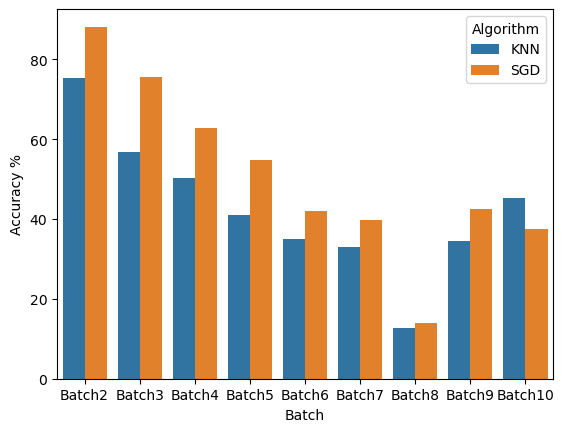

In [154]:
sns.barplot(df, x="Batch", y="Accuracy %", hue="Algorithm")